In [ ]:
import numpy as np
import pandas as pd

import re
import string    #We are going to use "string" data. So. we have imported this

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  #to get tokens of words
from nltk.stem import PorterStemmer   # to get the root words
from nltk.stem import WordNetLemmatizer     # to get the root words whhich actually have meanings and it will exist in "WordNet" (it is type of dictionary)

7
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Dataset Link : https://www.kaggle.com/datasets/notlucasp/financial-news-headlines 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
linear=LinearRegression()
bnb=BernoulliNB()
mnb=MultinomialNB()
gbg=GradientBoostingClassifier()
dctc= DecisionTreeClassifier()
kneigh=KNeighborsClassifier()
xg=XGBClassifier()
linear_svc=LinearSVC()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer   #we want to use tfidfvectorizer 

In [ ]:
cnbc_headline=pd.read_csv("/content/cnbc_headlines.csv")

In [ ]:
cnbc_headline.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [ ]:
#Checking which columns have categorical, numerical or boolean 
cnbc_headline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
cnbc_headline.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
cnbc_headline.shape

(3080, 3)

In [ ]:
cnbc_headline.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [ ]:
cnbc_headline=cnbc_headline.dropna()

In [ ]:
cnbc_headline.isnull().sum().sum()

0

In [ ]:
# Drop the duplicate rows in the dataset and keep the forst one
cnbc_headline=cnbc_headline.drop_duplicates(subset=['Headlines','Description'], keep='first')
cnbc_headline.reset_index(drop=True, inplace=True)
cnbc_headline

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
cnbc_headline.shape

(2790, 3)

#BASIC EDA ON "GUARDIAN HEADLINES DATASET

In [ ]:
guardian_headlines=pd.read_csv('/content/guardian_headlines.csv')

In [ ]:
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
guardian_headlines.shape

(17800, 2)

In [ ]:
guardian_headlines.info

<bound method DataFrame.info of             Time                                          Headlines
0      18-Jul-20   Johnson is asking Santa for a Christmas recovery
1      18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2      18-Jul-20  Five key areas Sunak must tackle to serve up e...
3      18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4      18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
...          ...                                                ...
17795  17-Dec-17  How investing in solar energy can create a bri...
17796  17-Dec-17     Poundland suppliers hit by insurance downgrade
17797  17-Dec-17  Cryptocurrencies: City watchdog to investigate...
17798  17-Dec-17  Unilever sells household name spreads to KKR f...
17799  17-Dec-17  The Guardian view on Ryanair’s model: a union-...

[17800 rows x 2 columns]>

In [ ]:
guardian_headlines.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [ ]:

duplicates = guardian_headlines.duplicated(subset=['Headlines'])

if duplicates.any():
    print("Duplicates found in the column.")
else:
    print("No duplicates found in the column.")

Duplicates found in the column.


In [ ]:
guardian_headlines=guardian_headlines.drop_duplicates(subset=['Headlines'], keep='first')
guardian_headlines.reset_index(drop=True, inplace=True)
guardian_headlines

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17790,17-Dec-17,How investing in solar energy can create a bri...
17791,17-Dec-17,Poundland suppliers hit by insurance downgrade
17792,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17793,17-Dec-17,Unilever sells household name spreads to KKR f...


#EDA ON Reuters Headlines

In [ ]:
reuters_headlines=pd.read_csv('/content/reuters_headlines.csv')

In [ ]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [ ]:
reuters_headlines.shape

(32770, 3)

In [ ]:
reuters_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
reuters_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
duplicates = reuters_headlines.duplicated(subset=['Headlines','Description'])

if duplicates.any():
    print("Duplicates found in the column.")
else:
    print("No duplicates found in the column.")

Duplicates found in the column.


In [ ]:
reuters_headlines=reuters_headlines.drop_duplicates(subset=['Headlines'], keep='first')
reuters_headlines.reset_index(drop=True, inplace=True)
reuters_headlines

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32570,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32571,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32572,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32573,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#DATA PRE-PROCESSING
1. Lowercase: It is necessary to change the texts into lowercase because we know that difference in case changes the ASCII values of the character.
2. Removing pUnctuatiuons: As we know that punctuations present in the data donot add value to the data. The punctuation when attached to any word, will create a problem in differentiating with other words. So, we should remove them.
3. Remove Stopwords: Stopwords include "an, in, the etc. " which are used to make sentences. They are not responsible to add meaning to the line.So, we should remove these words which will help in reducing the features from our data. These are removed after tokenizing the texts.
4. Stemming : A technique that takes the word to its root form.And, there are instances that the root word after doing stemming might not be meaningful because they donot focus on giving root words which are meaningful.
5. Lemmatizing : It takes the root word form called lemma.It is more accurate as it uses more informed analysis to create groups of words with similar meaning based on the context. So, it is complex and takes more time.



In [ ]:
def preprocessing_text(text):
  #lowering the texts
  text=text.lower()

  #removing punctuations
  text=text.translate(str.maketrans("","",string.punctuation))

  #remove stopwords
  stopword=set(stopwords.words('english'))
  text_tokens=word_tokenize(text)
  filtered_words=[word for word in text_tokens if word not in stopword]

  #stemming
  ps=PorterStemmer()
  stemmed_words=[ps.stem(w) for w in filtered_words]

  #lemmatization
  lemmatizer=WordNetLemmatizer()
  lemma_words= [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]

  return " ".join(lemma_words)

#VADER:
VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [ ]:
#importing the sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

#creating an object for the class "sentiment intensity analyzer"
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Function to decide sentiment as positive, negative or nutral
def do_analysis(score):
  if score<0.0:
    return 'Negative'
  elif score==0.0:
    return 'Nuetral'
  else:
    return 'Positive'

#Sentiment analysis 
It is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.

Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

In [ ]:
#Combining "cnbc" dataset and "reuters" dataset
new_data=pd.concat([cnbc_headline,reuters_headlines],axis=0)


In [ ]:
new_data.shape

(35365, 3)

In [ ]:
#making of a new copy of dataset
new_data_copy=new_data.copy()

In [ ]:
new_data.head(2)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."


In [ ]:
#Apply pre-processing to the new dataset
new_data['Description']=new_data['Description'].apply(preprocessing_text)
new_data.head(10)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...


In [ ]:
#Analyze polarity score of values in description and add new column for this in dataset.
ds_score=[]
for value in new_data['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])
new_data['ds_score']=ds_score
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32570,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32571,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32572,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32573,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [ ]:
#Apply the function which will state the polarity of the statement
new_data['ds_score']=new_data['ds_score'].apply(do_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32570,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Nuetral
32571,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Nuetral
32572,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32573,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


<Axes: xlabel='ds_score', ylabel='count'>

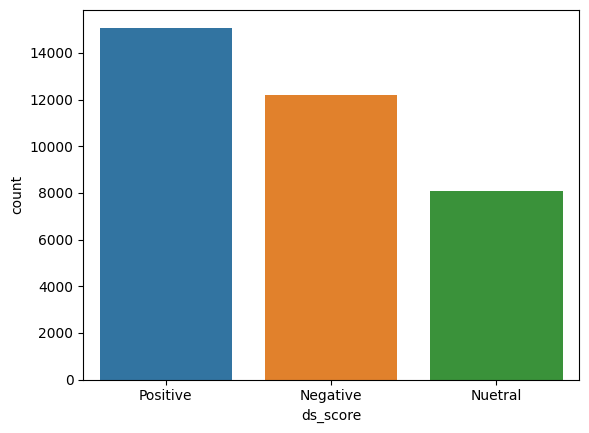

In [ ]:
#Plotting a count plot on description_score column
import seaborn as sns
sns.countplot(x="ds_score",data=new_data)


#Around- 14000 are Positive sentences, 12000 are negative sentences and 8000 ar eneutral

In [ ]:
#Pie chart


#MODEL BUILDING

In [ ]:
#SPLITTING THE DATASET INTO TRAIN AND TEST
#90% TRAIN, 10% TEST
X_train,X_test,y_train,y_test=train_test_split(new_data['Description'],new_data['ds_score'], test_size=0.10,random_state=40)

LINEAR SUPPORT VECTOR MACHINE

In [ ]:
pipe =Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])

#fit the pipeline to the data
linear_svc_model_ds=pipe.fit(X_train,y_train)

#predict on test data
prediction=linear_svc_model_ds.predict(X_test)
print("MODEL - LINEAR SVC")

accuracy_lsvc=print("accuracy score: {}".format(round(accuracy_score(y_test,prediction)*100,2)))

MODEL - LINEAR SVC
accuracy score: 93.75


In [ ]:
# Test the news

sent1=['11-year-old among 8 killed on Samruddhi expressway over weekend']
y_predict=linear_svc_model_ds.predict(sent1)
y_predict

array(['Nuetral'], dtype=object)

In [ ]:
sent2=['Amazon employees walk out to protest climate, return-to-office mandate']
y_predict=linear_svc_model_ds.predict(sent2)
y_predict

array(['Negative'], dtype=object)

In [ ]:
sent3=["74-yr-old who dug a well in water-starved Loliem wins biodiversity award"]
y_predict=linear_svc_model_ds.predict(sent3)
y_predict

array(['Positive'], dtype=object)